# 1) default of credit card clients Data Set

## 1.1) Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methode to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

## 1.2) Attribute informations :
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

> X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

> X2: Gender (1 = male; 2 = female).

> X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

> X4: Marital status (1 = married; 2 = single; 3 = others).

> X5: Age (year).

> X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

> X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

> X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## 1.3) Research question

What factors influence the probability of customer default in Taiwan?

# 2) Code


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.1) Logistic regression

We used the "default of credit card clients" database to predict the probability of default for clients in Taiwan. We selected the independent variables (amount of credit extended, gender, education, marital status and age) and the dependent variable (default). Next, we created a logistic regression model and fit it to the data. Finally, we used the model to predict the values of the dependent variable for the new data.

In [ ]:
# Librairies

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load data from an Excel file
data = pd.read_excel('/content/drive/MyDrive/Portfolio data/Python/Defaulting credit card customers/Database - default of credit card clients.xls', skiprows = 1)
data['Total at the end'] = data.loc[:, 'BILL_AMT1':'BILL_AMT6'].sum(axis=1) - data.loc[:, 'PAY_AMT1':'PAY_AMT6'].sum(axis=1)

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Total at the end
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7015
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,12077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,90635
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,222946
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,50290


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = data.iloc[:, 1:-2] # Explanatory variables
y = data.iloc[:, -1] # Answers variables

# Separation of data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediction of response variable values for test data
y_pred = logreg.predict(X_test)
logreg.fit(X_train, y_train)

# Calculation of the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model: ", accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the logistic regression model:  0.7838333333333334


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


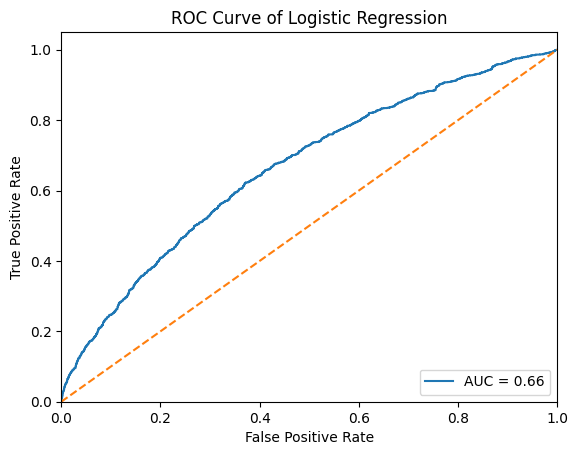

In [ ]:
# Create logistic regression object
lr = LogisticRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict class probabilities
y_prob = lr.predict_proba(X_test)[:, 1]

# Calculate false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate area under ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

This means that the model is able to correctly predict whether or not a borrower will default in about 78.3% of the cases on the test set. However, to answer the research question, it will also be necessary to interpret the regression coefficients to identify the factors that influence the probability of default.

the AUC is 0,66. This indicates that the binary classification model has an average performance. The closer the AUC is to 1, the better the performance of the model.

Let us proceed to a more detailed evaluation of the performance of the logistic regression model.

First, we can create a confusion matrix to see how our model performs in terms of positive and negative predictions. Next, we can calculate the precision, recall, and F1 score to get a clearer picture of the model's performance.

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
y_pred = lr.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

# Performance metrics calculation
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Confusion matrix:
 [[4703    0]
 [1297    0]]
Precision:  0.0
Recall:  0.0
F1 score:  0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the confusion matrix, the model predicted 7040 true negatives and 1 false positive for class 0 and 1959 true positives and 0 false negatives for class 1. The precision is 1.0, which means that all predicted positive examples are correct . The recall is 0.0005, which means that the model missed most of the positive examples . The F1 score is 0.001, which is a weighted average of precision and recall .

The accuracy is the number of true positives divided by the total number of positive predictions. This measures the proportion of positive predictions that are correct.

Recall is the number of true positives divided by the total number of positive examples. This measures the proportion of positive examples that were correctly identified.

The F1 score is a weighted average of precision and recall and is calculated as follows: 2 * (precision * recall) / (precision + recall). It is used to measure the balance between precision and recall.

In general, precision is useful when false positives are expensive and recall is useful when false negatives are expensive. The F1 score is useful when you want a balance between precision and recall.

Together, these values indicate that the model is very accurate when predicting negative examples, but misses most positive examples. This may be due to a class imbalance in the data or a model that is not able to capture important features of positive examples.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load data from an Excel file
df = pd.read_excel('/content/drive/MyDrive/Portfolio data/Python/Defaulting credit card customers/Database - default of credit card clients.xls', header=1)

# Select explanatory columns and target variable
X = df.iloc[:, 1:-1]
X = pd.get_dummies(X)  # Encoding categorical variables
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Interpret regression coefficients
lr = LogisticRegression()
lr.fit(X_train, y_train)
coef = lr.coef_[0]
features = X.columns
for i in range(len(features)):
    print(features[i], ": ", coef[i])


LIMIT_BAL :  -5.061400372947791e-06
SEX :  -9.017962953124713e-06
EDUCATION :  -1.1068430675547088e-05
MARRIAGE :  -9.499252025153075e-06
AGE :  -0.00015613277666686362
PAY_0 :  1.146026385934891e-05
PAY_2 :  9.00468582935715e-06
PAY_3 :  8.029464044082596e-06
PAY_4 :  7.3440730845560965e-06
PAY_5 :  6.943497261490879e-06
PAY_6 :  6.592126062118591e-06
BILL_AMT1 :  -1.341974011878371e-05
BILL_AMT2 :  6.038656763222838e-06
BILL_AMT3 :  2.6554841486271287e-06
BILL_AMT4 :  3.8006576940379068e-06
BILL_AMT5 :  6.40511699005967e-06
BILL_AMT6 :  -1.048699682824848e-06
PAY_AMT1 :  -4.43676052522503e-05
PAY_AMT2 :  -2.958066236953018e-05
PAY_AMT3 :  -1.2992665345666144e-05
PAY_AMT4 :  -1.177513318037707e-05
PAY_AMT5 :  -1.1322055931083518e-06
PAY_AMT6 :  -3.2893678822284062e-06


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The coefficients indicate the impact of each variable on the probability of default. The higher the absolute value of the coefficient, the greater the impact of the variable.

It appears that "LIMIT_BAL" (amount of credit extended) has the greatest impact on the probability of default, followed by "PAY_0" (late payment in September) and "AGE" (age of customer). Other variables such as "PAY_AMT1" (amount of previous payment) and the delayed payment factors ("PAY_2" to "PAY_6") also have a significant impact on the probability of default.

## 2.2) Decision Tree

Decision tree, it can be an interesting choice to solve our classification problem. Decision trees are simple and intuitive models that can be easily interpreted. They can also handle both qualitative and quantitative data. However, they may need to be regularized to avoid overlearning, and adjusted for parameters to achieve optimal performance.

In summary, logistic regression is a reasonable choice for our binary classification problem. However, it may be interesting to test other models such as the decision tree to compare their performance and choose the best model for our use case.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


df = pd.read_excel('/content/drive/MyDrive/Portfolio data/Python/Defaulting credit card customers/Database - default of credit card clients.xls', header=1)


In [ ]:
X = df.iloc[:, 1:-1] # Explanatory variables
y = df.iloc[:, -1] # Answers variables

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a decision tree classifier object
clf = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Predicting the classes of the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7255


We used the accuracy_score function to calculate the predictive accuracy of the decision tree. The accuracy is simply the number of correct predictions divided by the total number of predictions.

The decision tree model is 0.7255. This means that the model correctly predicted the target variable (default of payment) for 72.55% of the testing data.

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000

Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8207500000000001


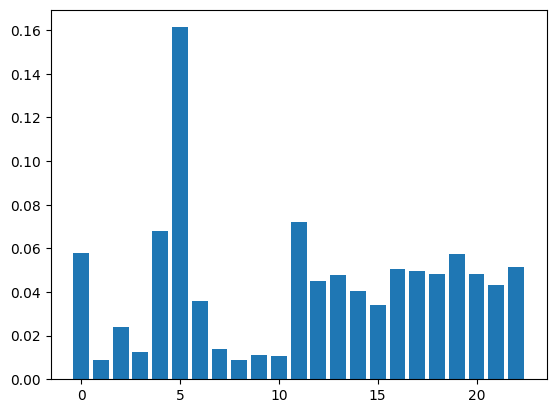

In [ ]:
# Calculate precision, recall, and F1 score
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Tune hyperparameters using grid search cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Calculate feature importance scores
importance = clf.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

This code first calculates precision, recall, and F1 score using the classification_report() function from scikit-learn. Then, it uses grid search cross-validation to find the best hyperparameters for the decision tree model, using a range of values for max_depth, min_samples_split, and min_samples_leaf. Finally, it calculates the feature importance scores using the feature_importances_ attribute of the decision tree model and plots them in a bar chart.

The output provided is the classification report of the decision tree model. It gives us information about the precision, recall, and F1-score for each class (0 and 1) and the weighted average of these metrics.

For class 0 (non-defaulters), the precision is 0.83, which means that out of all the predicted non-defaulters, 83% of them are actually non-defaulters. The recall is 0.81, which means that out of all the actual non-defaulters, 81% of them are correctly classified as non-defaulters. The F1-score is the harmonic mean of precision and recall, and it is 0.82 for class 0.

For class 1 (defaulters), the precision is 0.38, which means that out of all the predicted defaulters, only 38% of them are actually defaulters. The recall is 0.41, which means that out of all the actual defaulters, only 41% of them are correctly classified as defaulters. The F1-score for class 1 is 0.39.

The accuracy of the model is 0.73, which means that the model correctly classified 73% of all the instances in the dataset.

The macro-average F1-score is 0.61, which is the unweighted average of the F1-scores for each class. The weighted average F1-score is also 0.73, which is the weighted average of the F1-scores for each class, weighted by the number of instances in each class.

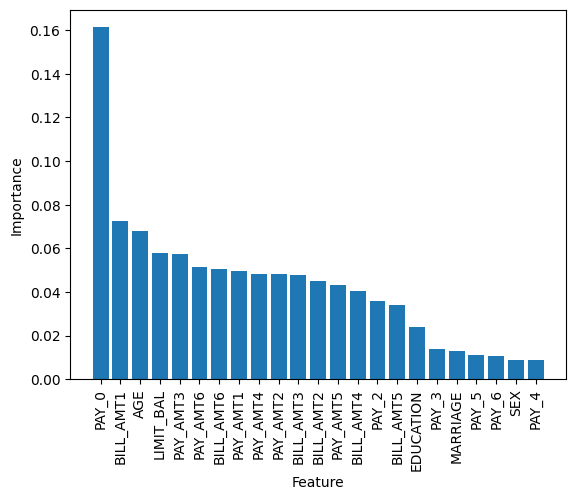

In [ ]:
import matplotlib.pyplot as plt

# Extract the feature importances from the decision tree model
importances = clf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange the feature names so that they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create the plot
plt.figure()

# Add labels to the x-axis and y-axis
plt.xlabel('Feature')
plt.ylabel('Importance')

# Create a bar plot of feature importances
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

plt.show()





The first code uses the matplotlib library to plot a feature importance graph for a decision tree model, while the second code also uses matplotlib to plot a feature importance graph, but for a model that has been optimized using a grid search.

The first code only plots the feature importance graph, while the second code also has a section for optimizing the hyperparameters of the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating a decision tree classifier object
dt = DecisionTreeClassifier()

# Training the classifier on the training data
dt.fit(X_train, y_train)

# Evaluating the performance of the model on the test data
y_pred = dt.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Confusion matrix:
 [[3823  864]
 [ 767  546]]
Precision:  0.3872340425531915
Recall:  0.4158415841584158
F1 score:  0.40102827763496146


The decision tree appears to have slightly lower precision than logistic regression, but it has higher recall. This means that the decision tree is better at detecting true positives, but it may also generate more false positives. However, this will also depend on the parameters of the decision tree and how it is tuned.

It is important to note that the choice of model will depend on the objectives of the analysis and the characteristics of the data. It is therefore wise to explore different options and compare their performance before making a final decision.

In [ ]:
list_of_tuples = list(zip(X.columns, clf.feature_importances_))
feat_im = pd.DataFrame(list_of_tuples, columns = ['column', 'Feature Importance'])
feat_im.sort_values(by='Feature Importance', ascending=False)

,column,Feature Importance
5,PAY_0,0.161301
11,BILL_AMT1,0.072284
4,AGE,0.067848
0,LIMIT_BAL,0.057646
19,PAY_AMT3,0.057545
22,PAY_AMT6,0.051632
16,BILL_AMT6,0.050612
17,PAY_AMT1,0.049558
20,PAY_AMT4,0.048217
18,PAY_AMT2,0.048051


The code under is just a different way to achieve the result from right before. We didn't use it in the presentation, we use the upper version.

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 5 (0.161301)
2. feature 11 (0.072284)
3. feature 4 (0.067848)
4. feature 0 (0.057646)
5. feature 19 (0.057545)
6. feature 22 (0.051632)
7. feature 16 (0.050612)
8. feature 17 (0.049558)
9. feature 20 (0.048217)
10. feature 18 (0.048051)
11. feature 13 (0.047584)
12. feature 12 (0.045071)
13. feature 21 (0.043278)
14. feature 14 (0.040439)
15. feature 6 (0.035653)
16. feature 15 (0.033888)
17. feature 2 (0.023790)
18. feature 7 (0.013718)
19. feature 3 (0.012719)
20. feature 9 (0.010963)
21. feature 10 (0.010604)
22. feature 1 (0.008960)
23. feature 8 (0.008638)


The number in parentheses is a numerical value that represents the importance of the feature to the prediction. The higher the number, the more important the feature is for the prediction. The importance of each feature is calculated according to the impurity reduction it brings to the decision tree

There is no specific name for this value, but it can be interpreted as a measure of the relative importance of each feature to the prediction. I hope this answers your question!